In [18]:
# -*- coding:utf-8 -*-
# Author:凌逆战 | Never
# Date: 
"""
从时域和频响上 对比周期窗和对称窗的差异
"""
import numpy as np
from numpy.fft import rfft
import scipy.signal as signal
import matplotlib.pyplot as plt

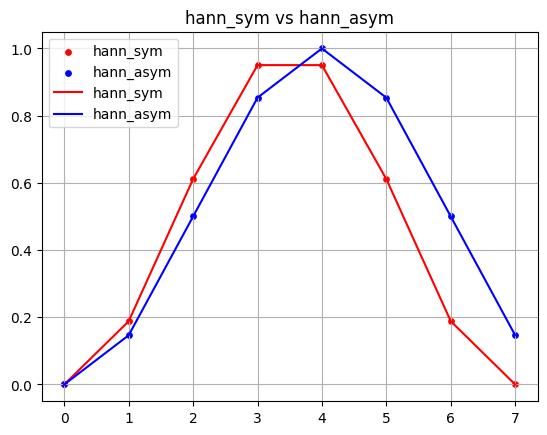

In [19]:

window_len = 8
hann_sym = signal.windows.hann(window_len, sym=True)  # 对称的hann窗
hann_asym = signal.windows.hann(window_len, sym=False)  # 非对称的hann窗

# 画散点图
plt.figure()
plt.title("hann_sym vs hann_asym")
plt.scatter(np.arange(len(hann_sym)), hann_sym, label="hann_sym", s=15, c="r")
plt.scatter(np.arange(len(hann_asym)), hann_asym, label="hann_asym", s=15, c="b")
# 画线
plt.plot(hann_sym, label="hann_sym", c="r")
plt.plot(hann_asym, label="hann_asym", c="b")

plt.legend()
plt.grid()
plt.show()


In [20]:
def frequency_response(window, window_len, NFFT):
    A = rfft(window, NFFT) / (window_len / 2)  # (513,)
    mag = np.abs(A)
    freq = np.linspace(0, 0.5, len(A))
    # 忽略警告
    with np.errstate(divide='ignore', invalid='ignore'):
        response = 20 * np.log10(mag)
    response = np.clip(response, -150, 150)
    return freq, response

(257,)
(257,)


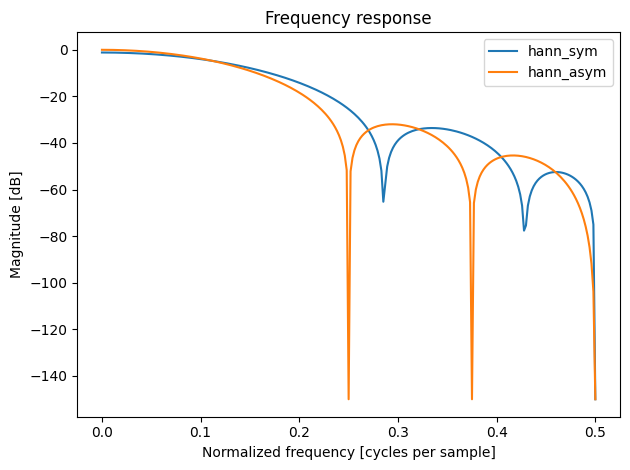

In [21]:
freq, hann_sym_FreqResp = frequency_response(hann_sym, window_len, NFFT=512)
freq, hann_asym_FreqResp = frequency_response(hann_asym, window_len, NFFT=512)
print(freq.shape)
print(hann_sym_FreqResp.shape)
plt.figure()
plt.title("Frequency response")
plt.plot(freq, hann_sym_FreqResp, label="hann_sym")
plt.plot(freq, hann_asym_FreqResp, label="hann_asym")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.legend()
plt.tight_layout()
plt.show()